<style> 
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: center;
        border-radius: 20px;
        height: 220px;
        width: 98.9%;
        background: linear-gradient(135deg, #2B3078, #7D85FF);
        color: white;
        font-family: Arial, Helvetica, sans-serif;
        h1 {
            font-weight: bold;
            margin: 0;
            padding: 5px;
        }
        p {
            width: 50%;
            text-align: center;
            margin: 0;
            padding: 5px;
        }
        svg {
            position: absolute;
            top: 20px;   
            left: 70px; 
            width: 70px;
            height: auto;
        }
    }
</style>
<div class="main">
    <h1>Análise Exploratória</h1>
    <p>Este notebook em Python analisa os dados da pesquisa realizada entre os dias 6 de setembro e 20 de outubro, que teve como objetivo conhecer as características do público-alvo do aplicativo IARA.</p>
    <svg width="448" height="204" viewBox="0 0 448 204" fill="none" xmlns="http://www.w3.org/2000/svg">
    <path d="M369.352 66.292C377.078 66.2549 384.526 66.6689 391.952 69.0293C400.6 71.7775 408.055 77.2546 414.552 83.4678V69.9072H448V200.084H415.456L413.501 189.999C403.938 199.562 396.431 200.756 382.912 203.145C372.628 204.962 361.074 203.858 351.271 200.357C296.132 180.665 295.082 95.8056 346.752 71.5186C353.757 68.2253 361.612 66.3291 369.352 66.292ZM113.518 68.4863C122.124 66.0573 131.796 65.443 140.638 66.8242C153.635 68.8546 163.39 74.9186 173.183 83.4678V69.9072H206.631V200.084H173.183L171.501 188.499C164.02 195.979 158.2 198.604 147.87 201.704C141.058 203.747 134.128 203.859 127.078 203.687C119.687 203.506 112.062 201.606 105.382 198.474C59.4556 176.943 53.7438 106.439 95.4375 77.1768C100.901 73.3429 107.09 70.3007 113.518 68.4863ZM303.359 67.1953V98.835C292.964 98.835 280.407 97.7265 271.723 104.612C262.196 112.167 261.789 122.735 261.775 133.702V200.357L227.423 200.084V140.42C227.423 117.081 225.638 92.8535 247.311 77.8389C251.415 74.9949 256.136 72.8406 260.871 71.2803C274.475 66.7982 289.226 67.1953 303.359 67.1953ZM51.1416 73.5234V200.084H16.7891V73.5234H51.1416ZM162.3 162.854C187.852 139.427 168.571 90.9566 132.503 97.4482C126.008 98.6172 119.507 101.296 114.458 105.587C90.8946 125.614 101.766 166.852 132.503 171.273C136.229 171.81 139.61 172.176 143.352 171.504C150.215 170.272 157.099 167.621 162.3 162.854ZM388.337 98.1455C383.595 97.0282 378.704 96.6645 373.873 97.4248C337.805 103.105 331.532 157.363 366.641 169.757C373.173 172.063 379.79 172.138 386.529 171.025C423.932 164.849 424.52 106.668 388.337 98.1455Z" fill="white"/>
    <path d="M34 0L44.0975 23.9025L68 34L44.0975 44.0975L34 68L23.9025 44.0975L0 34L23.9025 23.9025L34 0Z" fill="white"/>
    </svg>
</div>


<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 80px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
    }
</style>
<div class="main">
    <h2>Importações e Configurações</h2>
</div>

In [163]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
from IPython.display import Markdown, display
from sqlalchemy import create_engine
import seaborn as sns
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud

load_dotenv()

True

<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        width: 98%;
        height: 520px;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        font-size: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
        p {
            margin: 0;
            padding-top: 10px;
            padding-right: 20px;
        }
    }
</style>
<div class="main">
    <h2>Extração do Dataset</h2>
    <p>Cada coluna do dataset representa uma pergunta do questionário, questionário este que está salvo em um banco de dados SQL. A seguir, uma breve explicação sobre cada coluna:</p>
    <ul>
        <li><b>id</b> – Identificador da resposta</li>
        <li><b>email</b> – E-mail do participante</li>
        <li><b>age</b> – Faixa etária</li>
        <li><b>state</b> – Estado onde trabalha</li>
        <li><b>abacus_counting_importance</b> – Importância da contagem de ábacos</li>
        <li><b>abacus_counting_time</b> – Tempo médio gasto na contagem</li>
        <li><b>has_problems</b> – Se enfrenta problemas no processo de contagem</li>
        <li><b>problems_quantity</b> – Nível dos problemas (1-5)</li>
        <li><b>technology_acceptance</b> – Aceitação de tecnologia (1–10) na fábrica</li>
        <li><b>can_use_mobile</b> – Se pode usar celular no trabalho</li>
        <li><b>is_signal_quality_satisfactory</b> – Qualidade do sinal de internet na fábrica</li>
        <li><b>photo_without_interference</b> – Se as fotos saem sem interferência atrás dos ábacos</li>
        <li><b>lighting_quality</b> – Qualidade da iluminação (1–5)</li>
        <li><b>would_use_or_recommend</b> – Se usaria ou recomendaria o aplicativo</li>
    </ul>
</div>

In [164]:
engine = create_engine(url=os.getenv('DB_URL'))
df = pd.read_sql('abacus_survey', engine)

df.head()

,id,email,age,job_responsibilities,state,abacus_counting_importance,abacus_counting_time,has_problems,technology_acceptance,can_use_mobile,is_signal_quality_satisfactory,photo_without_interference,lighting_quality,would_use_or_recommend,updated_at,problems_quantity
0,5,mariozankoaski@gmail.com,25 a 34 anos,Supervisor de produção,Santa Catarina (SC),5,10 ou menos,Não,NaN,Não,None,None,NaN,Sim,2025-10-01,0.0
1,22,cintya.christovam@germinare.org.br,18 a 24 anos,"Fazer a contagem do ábaco, supervisar a produç...",São Paulo (SP),4,10-20,Sim,8.0,Sim,Sim,None,NaN,Sim,2025-10-01,5.0
2,23,brenosilvadesouza15@gmail.com,25 a 34 anos,"Analiso os registros do ábaco, comparando com ...",Goiás (GO),4,10-20,Sim,7.0,Sim,Sim,None,NaN,Sim,2025-10-01,4.0
3,30,enzochristowam@gmail.com,18 a 24 anos,contar as miçangas do ábaco de passar para a p...,São Paulo (SP),5,10 ou menos,Sim,6.0,Sim,Não,None,NaN,Sim,2025-10-01,6.0
4,31,leticia.camargo@germinare.org.br,35 a 44 anos,"Supervisor do SIF, faço contagens de condenas,...",São Paulo (SP),5,10 ou menos,Sim,6.0,Sim,Não,None,NaN,Sim,2025-10-01,3.0


<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 80px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
    }
</style>
<div class="main">
    <h2>Informações Básicas</h2>
</div>

In [165]:
display(Markdown('### Dimensões'))
print(df.shape)

display(Markdown('### Tipos de Dados'))
print(df.dtypes)

display(Markdown('### Dados Faltantes'))
print(df.isnull().sum())

### Dimensões

(129, 16)


### Tipos de Dados

id                                         int64
email                                     object
age                                       object
job_responsibilities                      object
state                                     object
abacus_counting_importance                object
abacus_counting_time                      object
has_problems                              object
technology_acceptance                    float64
can_use_mobile                            object
is_signal_quality_satisfactory            object
photo_without_interference                object
lighting_quality                         float64
would_use_or_recommend                    object
updated_at                        datetime64[ns]
problems_quantity                        float64
dtype: object


### Dados Faltantes

id                                  0
email                               0
age                                 0
job_responsibilities              113
state                               0
abacus_counting_importance          0
abacus_counting_time                0
has_problems                        0
technology_acceptance               1
can_use_mobile                      0
is_signal_quality_satisfactory      4
photo_without_interference         15
lighting_quality                   15
would_use_or_recommend              0
updated_at                          0
problems_quantity                 113
dtype: int64


<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 80px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
    }
</style>
<div class="main">
    <h2>Tratamento do Dataset</h2>
</div>

In [166]:
df.drop(columns=['email', 'id', 'updated_at'], inplace=True)

yes_or_no_map = {'Sim':1, 'Não':0}

df['has_problems'] = df['has_problems'].map(yes_or_no_map)
df['can_use_mobile'] = df['can_use_mobile'].map(yes_or_no_map)
df['would_use_or_recommend'] = df['would_use_or_recommend'].map(yes_or_no_map)
df['is_signal_quality_satisfactory'] = df['is_signal_quality_satisfactory'].map(yes_or_no_map)
df['photo_without_interference'] = df['photo_without_interference'].map(yes_or_no_map)

df['age'] = df['age'].apply(lambda age: int(re.search(r'\d+', age).group()))
df['abacus_counting_time'] = df['abacus_counting_time'].apply(lambda abacus_counting_time: int(re.search(r'\d+', abacus_counting_time).group()))

df.head()

,age,job_responsibilities,state,abacus_counting_importance,abacus_counting_time,has_problems,technology_acceptance,can_use_mobile,is_signal_quality_satisfactory,photo_without_interference,lighting_quality,would_use_or_recommend,problems_quantity
0,25,Supervisor de produção,Santa Catarina (SC),5,10,0,NaN,0,NaN,NaN,NaN,1,0.0
1,18,"Fazer a contagem do ábaco, supervisar a produç...",São Paulo (SP),4,10,1,8.0,1,1.0,NaN,NaN,1,5.0
2,25,"Analiso os registros do ábaco, comparando com ...",Goiás (GO),4,10,1,7.0,1,1.0,NaN,NaN,1,4.0
3,18,contar as miçangas do ábaco de passar para a p...,São Paulo (SP),5,10,1,6.0,1,0.0,NaN,NaN,1,6.0
4,35,"Supervisor do SIF, faço contagens de condenas,...",São Paulo (SP),5,10,1,6.0,1,0.0,NaN,NaN,1,3.0


<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 170px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        font-size: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
        p {
            margin: 0;
            padding-top: 10px;
            padding-right: 20px;
        }
    }
</style>
<div class="main">
    <h2>Relação Entre os Atributos</h2>
    <p>No gráfico de relação entre os atributos é possível observar que a variável "technology_acceptance" apresenta uma tendência positiva em relação a "would_use_or_recommend", indicando que quanto maior a aceitação tecnológica, maior a probabilidade de o usuário utilizar ou recomendar o aplicativo. Já as variáveis age e abacus_counting_time não demonstram correlações claras, sugerindo que idade e tempo de contagem não influenciam diretamente a decisão.</p>
</div>

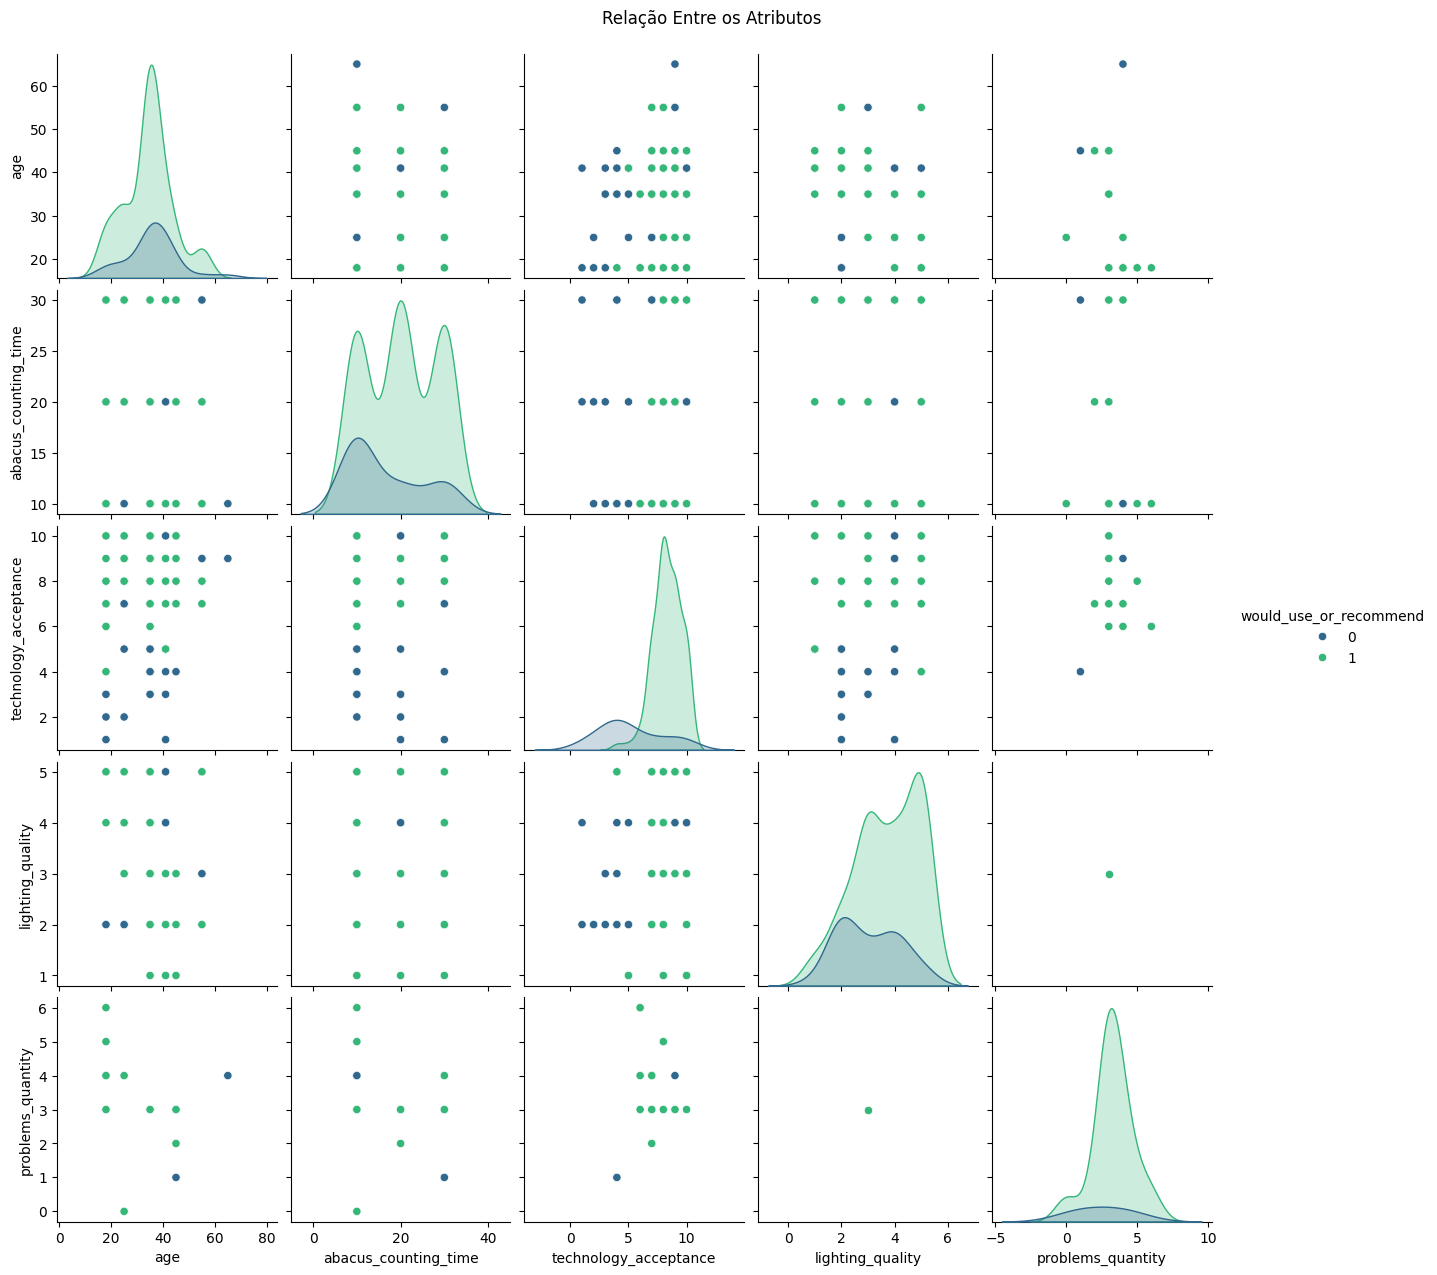

In [167]:
sns.pairplot(df.drop(columns=['has_problems', 'can_use_mobile', 'photo_without_interference', 'is_signal_quality_satisfactory']), hue='would_use_or_recommend', palette='viridis')
plt.suptitle("Relação Entre os Atributos", y=1.02)
plt.show()

<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 260px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
        p {
            font-size: 20px;
            margin: 0;
            padding-top: 10px;
            padding-right: 20px;
        }
    }
</style>
<div class="main">
    <h2>Distribuição dos Valores</h2>
    <p>Entre os participantes da pesquisa, a maioria tinha entre 35 e 40 anos e do estado de São Paulo, o que já era esperado devido ao contato do grupo com pessoas que se encaixavam nesse perfil. Também foi possível observar que, nas indústrias onde trabalham, há uma boa aceitação de novas tecnologias, o que é um ponto bastante positivo para o aplicativo IARA.
    De forma inesperada, os resultados mostraram que a contagem dos ábacos leva cerca de 10 minutos para ser concluída, um tempo menor do que o esperado, já que havia reclamações sobre a demora nesse processo.
    Os dados mais relevantes coletados foram relacionados à possibilidade de uso de celular nas fábricas, à existência de dificuldades durante a contagem dos ábacos e à possibilidade de usar ou recomendar o aplicativo. Felizmente, os resultados foram bem positivos, a maioria dos participantes afirmou conseguir usar o próprio celular (ou ter acesso a um fornecido pela fábrica), cerca de 60% relataram enfrentar problemas na contagem e aproximadamente 70% afirmaram que usariam ou recomendariam o aplicativo IARA.</p>
</div>

<Figure size 1500x800 with 0 Axes>

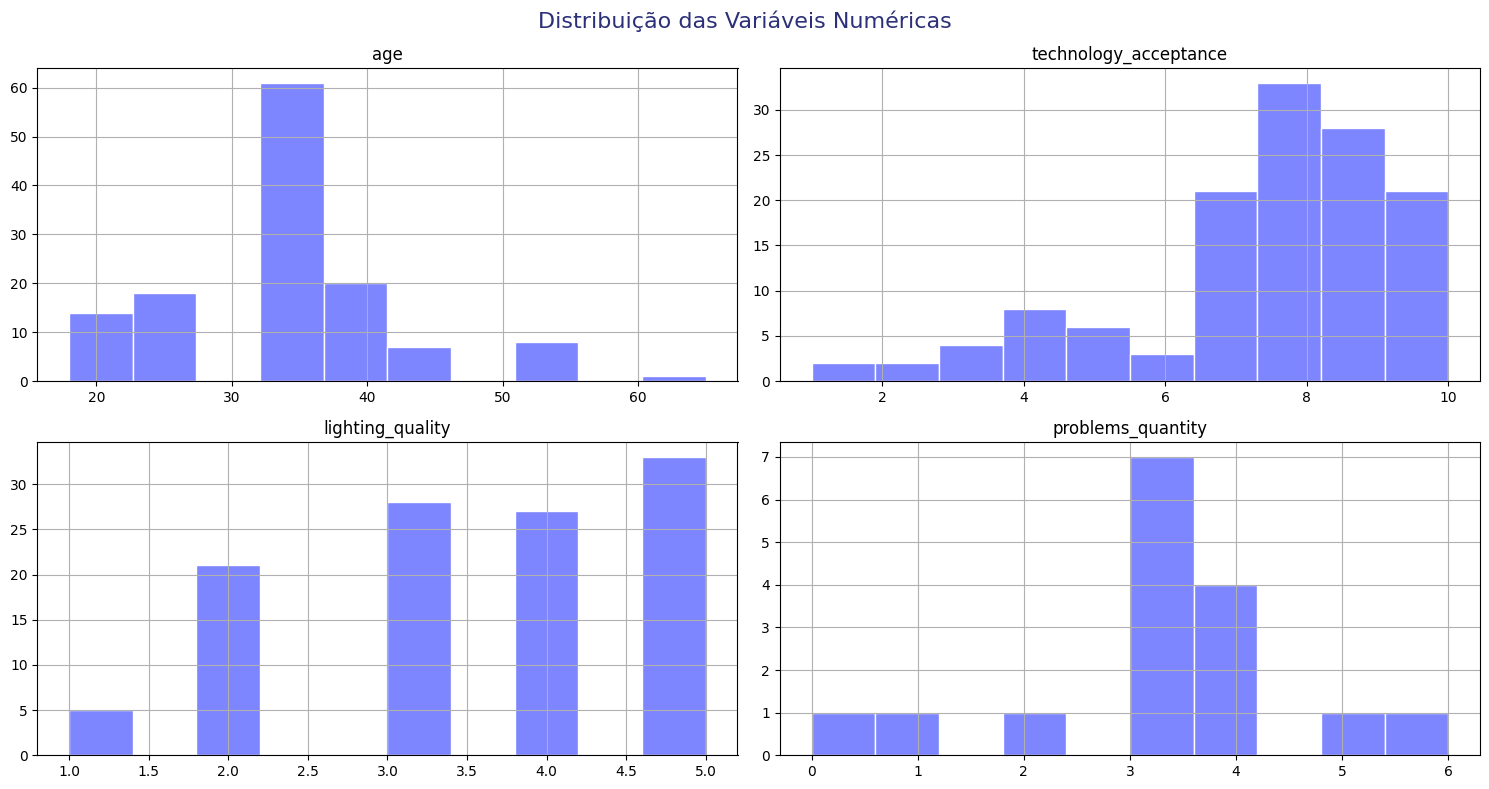

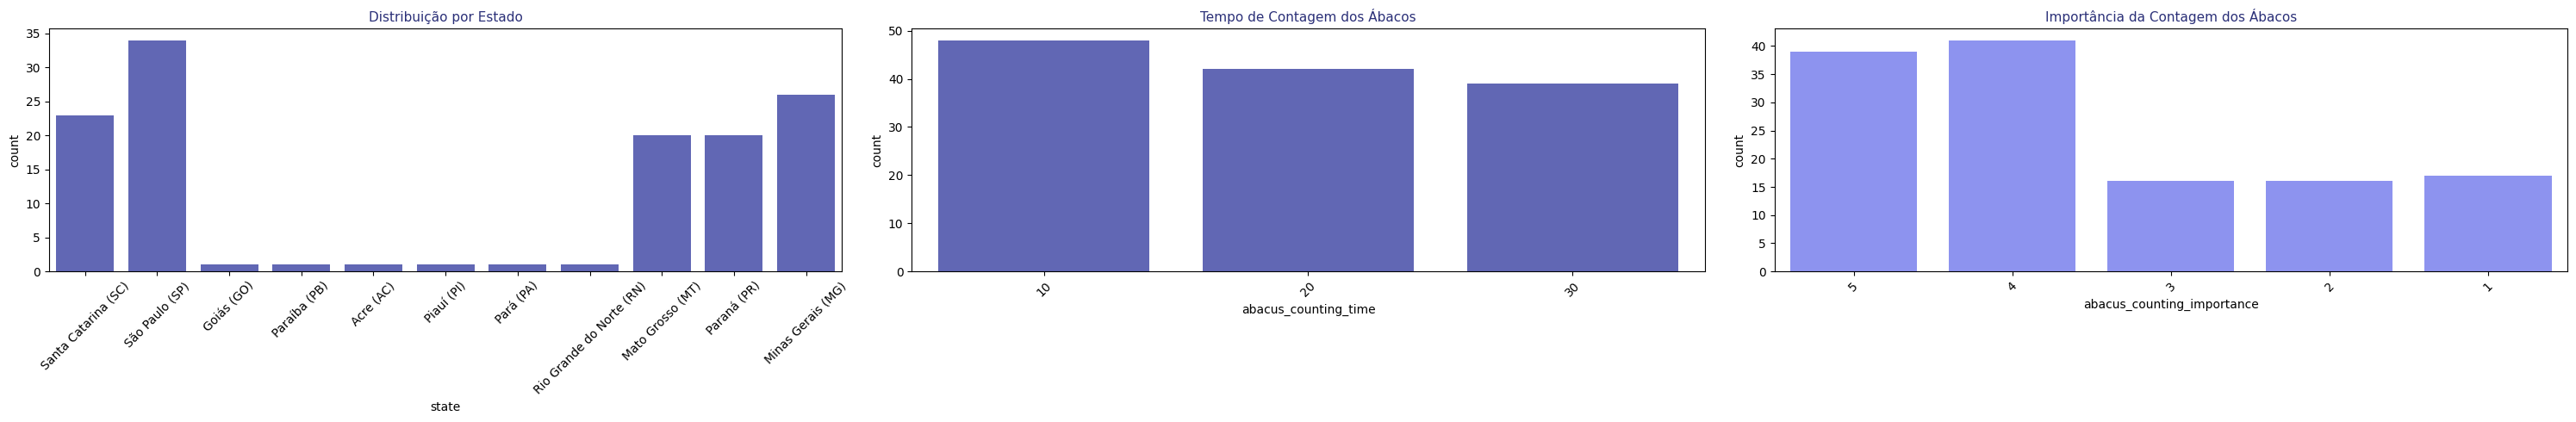

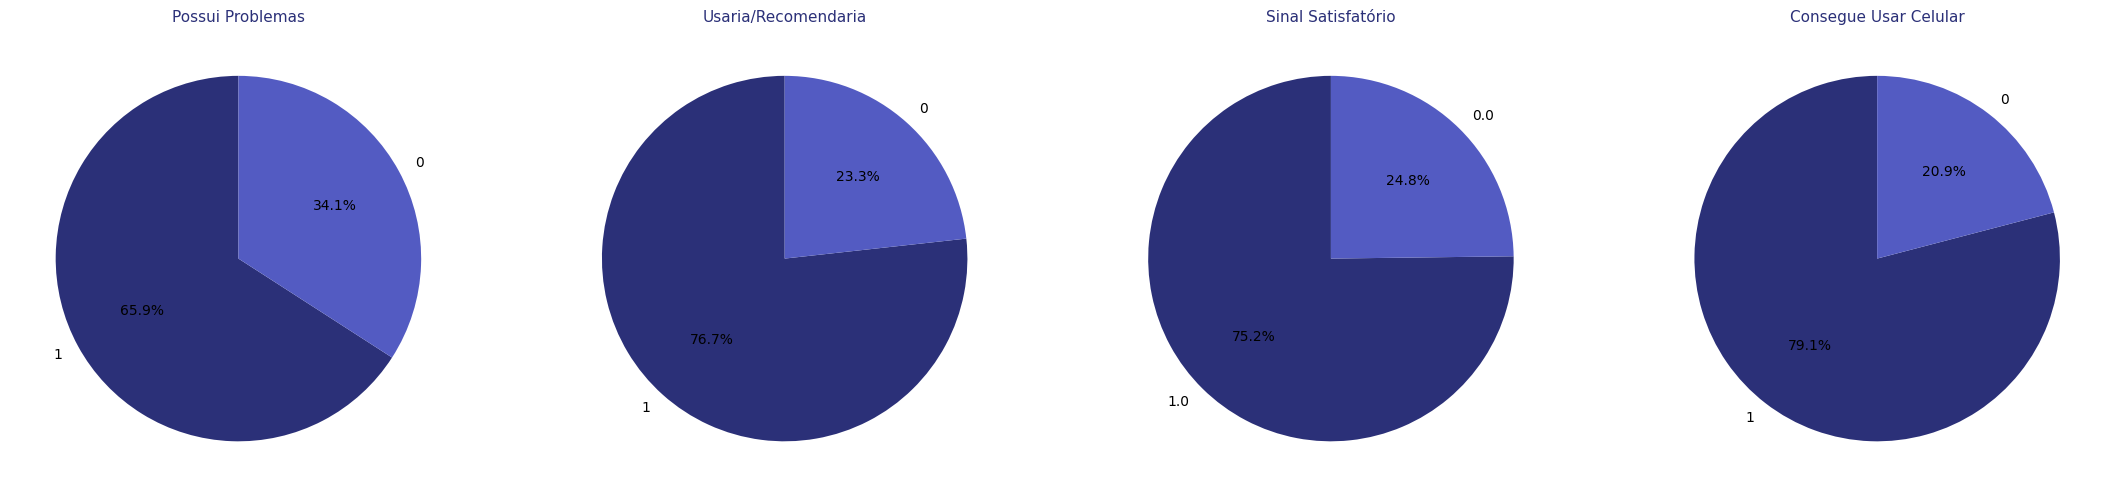

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
df.drop(columns=['has_problems', 'can_use_mobile', 'would_use_or_recommend', 'photo_without_interference', 'is_signal_quality_satisfactory', 'abacus_counting_time']
).hist(figsize=(15, 8), color='#7D85FF', edgecolor='white')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16, color='#2B3078')
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(30, 5))

sns.countplot(x='state', data=df, color='#535BC2', ax=axes[0])
axes[0].set_title('Distribuição por Estado', fontsize=11, color='#2B3078')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='abacus_counting_time', data=df, color='#535BC2', ax=axes[1])
axes[1].set_title('Tempo de Contagem dos Ábacos', fontsize=11, color='#2B3078')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(x='abacus_counting_importance', data=df, color='#7D85FF', ax=axes[2])
axes[2].set_title('Importância da Contagem dos Ábacos', fontsize=11, color='#2B3078')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(22, 5))

colors = ['#2B3078', '#535BC2', '#7D85FF']

values = df['has_problems'].value_counts()
axes[0].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(values)])
axes[0].set_title('Possui Problemas', fontsize=11, color='#2B3078')

values = df['would_use_or_recommend'].value_counts()
axes[1].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(values)])
axes[1].set_title('Usaria/Recomendaria', fontsize=11, color='#2B3078')

values = df['is_signal_quality_satisfactory'].value_counts()
axes[2].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(values)])
axes[2].set_title('Sinal Satisfatório', fontsize=11, color='#2B3078')

values = df['can_use_mobile'].value_counts()
axes[3].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(values)])
axes[3].set_title('Consegue Usar Celular', fontsize=11, color='#2B3078')

plt.tight_layout()
plt.show()

## Correlation Between columns

<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 250px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        font-size: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
        p {
            margin: 0;
            padding-top: 10px;
            padding-right: 20px;
        }
    }
</style>
<div class="main">
    <h2>Mapa de Calor</h2>
    <p>O mapa de calor mostra que a relação mais forte ocorre entre as variáveis "would_recommend" e "technology_acceptance". Essa correlação positiva indica que, quanto maior a aceitação de novas tecnologias pelas indústrias, maior é a probabilidade de utilizarem ou recomendarem o aplicativo. Esse resultado é bastante favorável, considerando que o aplicativo IARA tem como objetivo automatizar o processo de contagem de condenas. Além disso, outras variáveis, como "has_problems", "can_use_mobile" e "is_signal_quality_satisfactory", também apresentaram correlações positivas com "would_use_or_recommend". Nos gráficos de pizza, observa-se que a maioria das respostas para essas perguntas foi "Sim", o que também é bastante positivo para o aplicativo.</p>
</div>

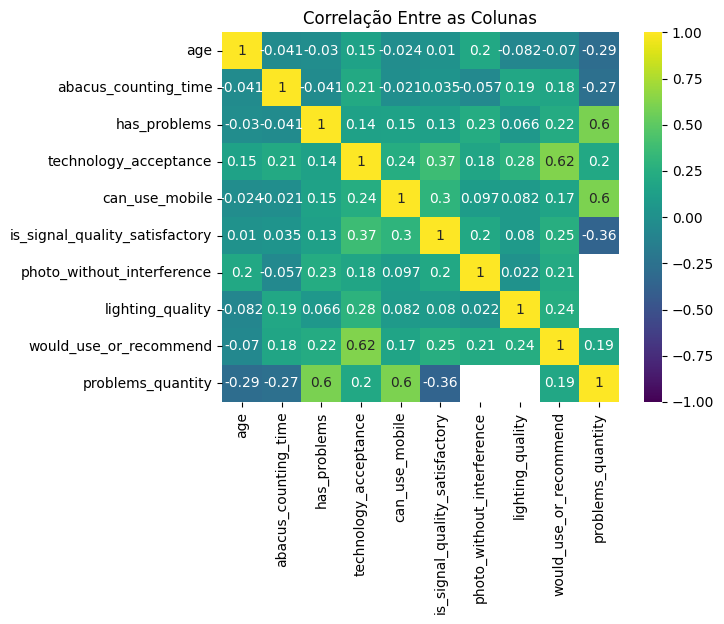

In [169]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlação Entre as Colunas')
plt.show()

<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 230px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        font-size: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
        p {
            margin: 0;
            padding-top: 10px;
            padding-right: 20px;
        }
    }
</style>
<div class="main">
    <h2>Nuvem de Palavras</h2>
    <p>Para a análise da coluna "job_responsibilities", foi criada uma nuvem de palavras com as expressões que mais apareceram nas respostas. Durante o processo, foram geradas nuvens gerais e também filtradas por "would_use_or_recommend". Como não houve diferença significativa entre as três visualizações, foi decidido manter apenas a versão geral.  
    Nessa nuvem, é possível perceber que a pesquisa alcançou o público-alvo desejado, profissionais que atuam no SIF e realizam a contagem de condenas em ábacos, já que algumas das palavras mais frequentes foram “ábacos”, “condena” e “contagem”.  
    Além disso, termos como “supervisionar”, “funcionários” e “fiscalizar” também apareceram com frequência, o que levou ao desenvolvimento da aba de gestão no aplicativo, para que os responsáveis pelo SIF tenham maior controle sobre suas equipes e sobre as alterações realizadas nas planilhas.</p>
</div>

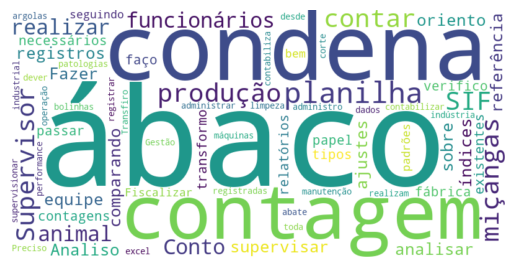

In [170]:
stop_words = set(stopwords.words('portuguese'))

texto = " ".join(df['job_responsibilities'].fillna("").astype(str))
palavras_filtradas = [w for w in texto.split() if w.lower() not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(palavras_filtradas))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<style>   
    .main {
        display: flex;
        flex-direction: column;
        justify-content: center;
        align-items: left;
        border-radius: 20px;
        height: 160px;
        width: 98%;
        background-color: white;
        color: #535bc2;
        font-family: Arial, Helvetica, sans-serif;
        border-left: 8px solid #535bc2; 
        border-bottom: 8px solid #535bc2;
        padding-left: 20px;
        h2 {
            font-size: 30px;
            font-weight: bold;
            margin: 0;
            padding: 0;
        }
        p {
            margin: 0;
            padding-top: 10px;
            padding-right: 20px;
        }
    }
</style>
<div class="main">
    <h2>Considerações Finais Sobre o Público-Alvo</h2>
    <p>Para finalizar a análise, mesmo com dados já muito positivos, é interessante observar os resultados filtrados apenas pelas pessoas que indicaram que utilizariam ou recomendariam o aplicativo. Pode-se perceber que informações como idade e gênero não se alteram significativamente com a filtragem. Entretanto, aspectos como possibilidade de usar o celular, importância da contagem e principalmente aceitação de tecnologia na fábrica apresentam crescimento considerável, o que demonstra uma característica muito interessante e positiva do público-alvo.</p>
</div>

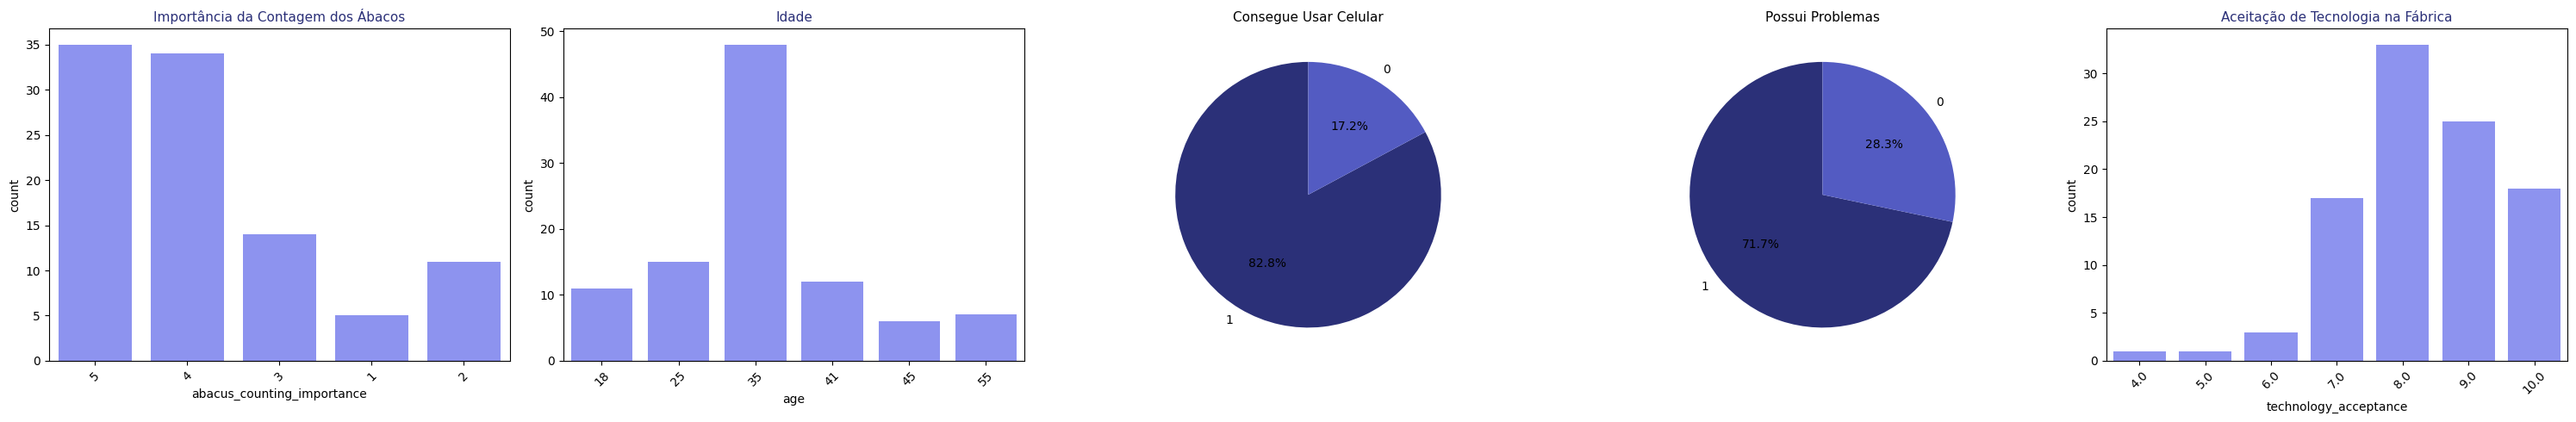

In [172]:
df = df[df['would_use_or_recommend'] == 1]

fig, axes = plt.subplots(1, 5, figsize=(30, 5))

sns.countplot(x='abacus_counting_importance', data=df, color='#7D85FF', ax=axes[0])
axes[0].set_title('Importância da Contagem dos Ábacos', fontsize=11, color='#2B3078')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='age', data=df, color='#7D85FF', ax=axes[1])
axes[1].set_title('Idade', fontsize=11, color='#2B3078')
axes[1].tick_params(axis='x', rotation=45)

values = df['can_use_mobile'].value_counts()
axes[2].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(values)])
axes[2].set_title('Consegue Usar Celular', fontsize=11)

values = df['has_problems'].value_counts()
axes[3].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(values)])
axes[3].set_title('Possui Problemas', fontsize=11)

sns.countplot(x='technology_acceptance', data=df, color='#7D85FF', ax=axes[4])
axes[4].set_title('Aceitação de Tecnologia na Fábrica', fontsize=11, color='#2B3078')
axes[4].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
